In [1]:
function img = data2img( data, r, c )

  data = data';
  [d,n] = size( data );
  bs = sqrt( d );
  if( r*c != d*n )
    disp( "Size mismatch" );
    return;
  end
  
  img = zeros( r, c );
  count = 1;
  for i=1:bs:r
    for j=1:bs:c
      img(i:i+bs-1,j:j+bs-1) = reshape( data(:,count), bs,bs );
      count = count + 1;
    end
  end
end

In [2]:
function ret = img2data( img, bs )

  [r,c] = size( img );

  ret = [];
  for i=1:bs:r
    for j=1:bs:c
      ret = [ret reshape( img(i:i+bs-1,j:j+bs-1), bs*bs, 1 ) ];
    end
  end

  ret = ret';
  
end

In [3]:
function [P, c, a] = PCA(data)
    % データサイズ取得
    [n, d] = size(data);
    % 分散共分散行列算出
    cov_mat = cov(data);

    % スペクトル分解
    % [P, L] = EIG(cov_mat);
    [P, L] = eig(cov_mat);
    [B, I] = sort(diag(L), "descend");
    P = P(:, I);
    L = diag(B);

    % 寄与率算出
    c = zeros(d, 1);
    for i = 1:d
        c(i) = L(i, i) / trace(L);
    end

    % 累積寄与率算出
    a = zeros(d, 1);
    for i = 1:d
        for k = 1:i
            a(i) += c(k);
        end
    end
end

In [4]:
function [ret, num] = PCA_represent(data, ac)
    % 主成分分析
    [P, c, a] = PCA(data);
    
    % 平均ベクトル算出
    ave = mean(data);

    % 後で全データに平均をまとめて足しこむための準備
    avemat = ones(size(data, 1), 1) * ave;
    
    % 本数を取得
    num = size(find(a < ac), 1);

    % 累積寄与率 ac となる部分の主成分を取得
    basis = P(:, 1:num);

    % 射影子を作成
    Prj = basis * basis';

    % データ再構成
    ret = (data - avemat) * Prj' + avemat;
    return;
end

In [5]:
# 画像読み込み
img = im2double(imread("LENA256.pgm"));
# 画像を多変量データに変換
data = img2data(img, 8);

In [6]:
[datareconst, num] = PCA_represent(data, 0.98);

In [7]:
imgreconst = data2img(datareconst, 256, 256);

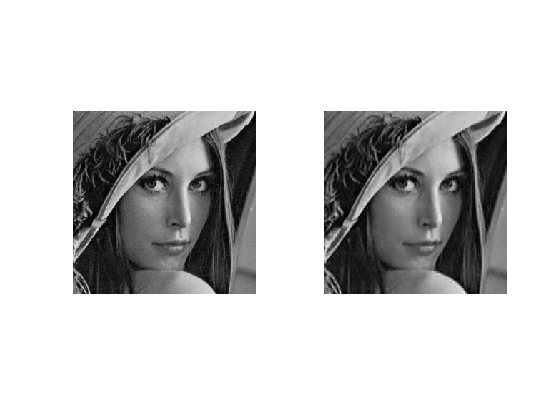

In [8]:
subplot(1, 2, 1);
imshow(img);
subplot(1, 2, 2);
imshow(imgreconst);

In [9]:
num

num =  11


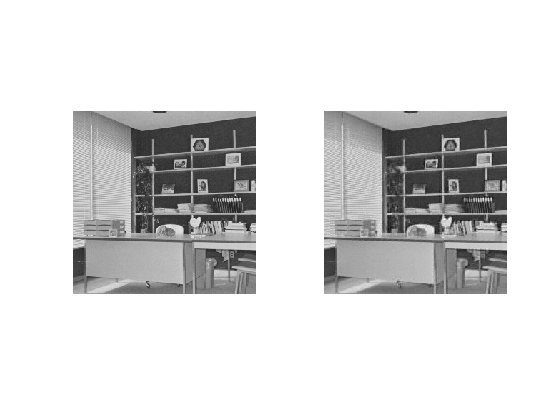

In [10]:
# 画像読み込み
img = im2double(imread("ROOM256.pgm"));
# 画像を多変量データに変換
data = img2data(img, 8);

[datareconst, num] = PCA_represent(data, 0.98);
imgreconst = data2img(datareconst, 256, 256);

subplot(1, 2, 1);
imshow(img);
subplot(1, 2, 2);
imshow(imgreconst);

In [11]:
num

num =  19
